<a href="https://colab.research.google.com/github/Christinathattil/MACHINE-LEARNING-PROJECTS/blob/Main/2348511_Linear_regression_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/computers.csv')

In [3]:
df.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [4]:
#calculating mean
mean_value=df['Minutes'].mean()
mean_value

#to understand whether we can plot best fit line

97.21428571428571

Text(0, 0.5, 'Minutes')

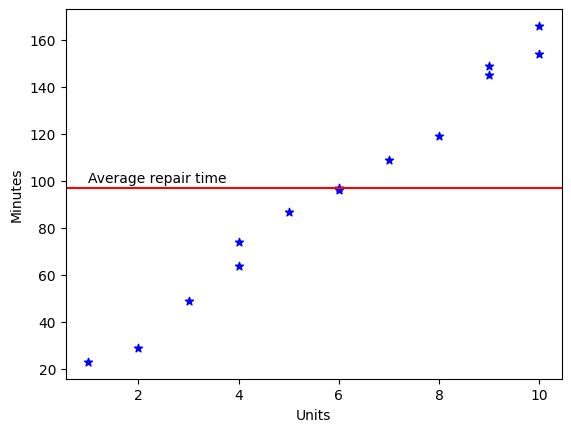

In [5]:
#plotting the actual time taken
plt.scatter(df['Units'],df["Minutes"], marker='*',color='blue')
plt.axhline(y=mean_value,color='red')

#Adding annotations, x label and y label
plt.annotate("Average repair time", xy=(1,mean_value+2.5))
plt.xlabel("Units")
plt.ylabel('Minutes')

In [6]:
minutes_model1=df['Minutes'].mean()

minutes_model2=10+12*df['Units']

minutes_model3=6+18*df['Units']

minutes_model1
minutes_model2
minutes_model3

0      24
1      42
2      60
3      78
4      78
5      96
6     114
7     114
8     132
9     150
10    168
11    168
12    186
13    186
Name: Units, dtype: int64

In [7]:
df['min_model1']=minutes_model1
df['min_model2']=minutes_model2
df['min_model3']=minutes_model3

df.head()

,Units,Minutes,min_model1,min_model2,min_model3
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78


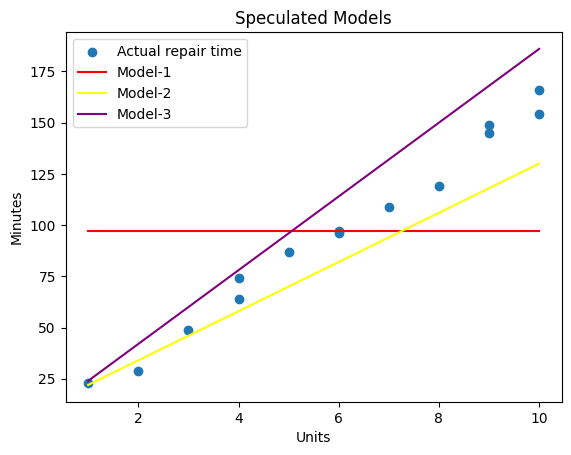

In [8]:
fig,ax=plt.subplots()

#plotting actual minutes
ax.scatter(x='Units', y='Minutes',data=df, label='Actual repair time')

#Plotting model-1 predictions
ax.plot(df['Units'], df['min_model1'],color='red',label='Model-1')

#Plotting model-2 predictions
ax.plot(df['Units'], df['min_model2'], color='yellow', label='Model-2')

#Plotting model-2 predictions
ax.plot(df['Units'], df['min_model3'], color='purple', label='Model-3')

#Adding x label, y label and title and legend

ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title('Speculated Models')
ax.legend()

Analyzing speculated model


In [9]:
model1_obs=pd.DataFrame({'Units':df.Units,
                         'Actual time' : df.Minutes,
                         'Predicted time': df.min_model1,
                         'Error' : (df.min_model1-df.Minutes)})

model1_obs

,Units,Actual time,Predicted time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [10]:
model2_obs=pd.DataFrame({'Units':df.Units,
                         'Actual time' : df.Minutes,
                         'Predicted time': df.min_model2,
                         'Error' : (df.min_model2-df.Minutes)})

model2_obs

,Units,Actual time,Predicted time,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


In [11]:
model3_obs=pd.DataFrame({'Units':df.Units,
                         'Actual time' : df.Minutes,
                         'Predicted time': df.min_model3,
                         'Error' : (df.min_model3-df.Minutes)})

model3_obs

,Units,Actual time,Predicted time,Error
0,1,23,24,1
1,2,29,42,13
2,3,49,60,11
3,4,64,78,14
4,4,74,78,4
5,5,87,96,9
6,6,96,114,18
7,6,97,114,17
8,7,109,132,23
9,8,119,150,31


In [12]:
#Sum of squared errors
sum(model1_obs.Error**2)

27768.357142857145

In [13]:
#Sum of squared errors
sum(model2_obs.Error**2)

4993

In [14]:
#Sum of squared errors
sum(model3_obs.Error**2)

5001

In [15]:
x=df.Units
y=df.Minutes

xy=x*y
n=len(df)

xmean=df.Units.mean()
ymean=df.Minutes.mean()

numerator=xy.sum()-n*xmean*ymean
denominator=(x**2).sum() - n*(xmean**2)

m=numerator/denominator
c=ymean - (m*xmean)

print('Intercept-c :', c, '; Coefficient-m', m)

Intercept-c : 4.161654135338296 ; Coefficient-m 15.508771929824569


In [21]:
best_fit_mod=c+m*df.Units
df['best_fit_mod']=best_fit_mod
df[['Units','Minutes','best_fit_mod']]

,Units,Minutes,best_fit_mod
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


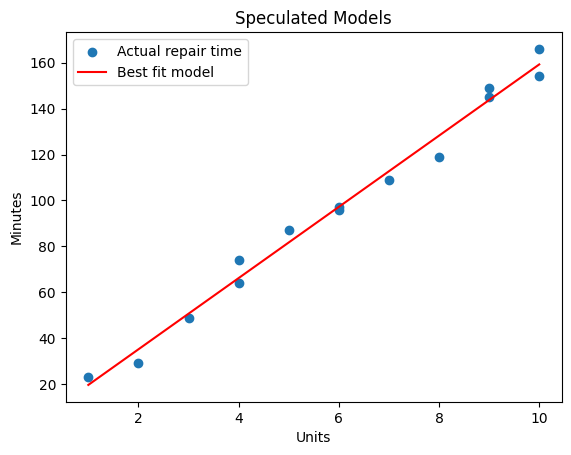

In [26]:
fig,ax=plt.subplots()

ax.scatter(x='Units',y='Minutes',data=df,label='Actual repair time')
ax.plot(df['Units'],df['best_fit_mod'],color='red',label='Best fit model')


ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title('Speculated Models')
ax.legend()

In [27]:
bestfitmod_obs=pd.DataFrame({
            'units':df['Units'],
            'Actual_time':df['Minutes'],
            'Predicted_time':df['best_fit_mod'],
            'Error':(df['best_fit_mod']-df['Minutes'])
})

bestfitmod_obs

,units,Actual_time,Predicted_time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


In [28]:
X=df[['Units']]
y=df[['Minutes']]

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [30]:
model.fit(X,y)

LinearRegression()

In [31]:
print("Intercept:",model.intercept_)
print("Coefficients",model.coef_)

Intercept: [4.16165414]
Coefficients [[15.50877193]]


In [32]:
sst=sum((df.Minutes-df.Minutes.mean())**2)
sst

27768.357142857145

In [33]:
sse=sum(bestfitmod_obs['Error']**2)
sse

348.848370927318

In [34]:
ssr=sst-sse
ssr

27419.508771929828

In [35]:
rsq=ssr/sst
rsq

0.9874371980620736